In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
cd gdrive/

[Errno 2] No such file or directory: 'gdrive/'
/content/gdrive/MyDrive


In [ ]:
cd MyDrive/

[Errno 2] No such file or directory: 'MyDrive/'
/content/gdrive/MyDrive


In [ ]:
cd Colab\ Notebooks

/content/gdrive/MyDrive/Colab Notebooks


In [ ]:
cd World\ Around\ Us\ Project

/content/gdrive/MyDrive/Colab Notebooks/World Around Us Project


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
x_length=64
y_length=64
max_temp=float(400) #This temperature is in degrees kelvin. Max temperature ever recorded was 329.85 kelvin in death valley California

In [ ]:
temp_arr=np.zeros((x_length,y_length))

In [ ]:
#temp_arr[:,0]=np.random.randint(0,max_temp,(x_length))
#temp_arr[0,:]=np.random.randint(0,max_temp,(y_length))
#temp_arr[:,x_length-1]=np.random.randint(1,max_temp,(x_length))
#temp_arr[y_length-1,:]=np.random.randint(1,max_temp,(y_length))

In [ ]:
def val_truncate(val):
    if val>max_temp:
        return max_temp
    
    elif val<0:
        return float(0)
    
    else:
        return val

In [ ]:
def boundary_alg(x_length):
    #split=4
    #start_mean_choice=np.random.randint(0,split-1)
    #start_mean = (max_temp*(start_mean_choice+1))/float(split)
    #val= np.random.normal()
    val=np.random.normal(max_temp/2,max_temp/4)
    val=val_truncate(val)
    #val=np.random.randint(0,401)
    val_list=[val]
    
    for i in range(x_length-1):
        direction = np.random.randint(0,3)
        direction-=1
        change=np.random.normal(20,10)
        val_list.append(val_truncate(val_list[i] + (direction*change)))
    
    return val_list
        
        
        

In [ ]:
temp_arr[:,0]=boundary_alg(x_length)
temp_arr[0,:]=boundary_alg(x_length)
temp_arr[:,x_length-1]=boundary_alg(x_length)
temp_arr[y_length-1,:]=boundary_alg(x_length)

In [ ]:
#temp_arr[:,0]=60+273
#temp_arr[0,:]=10 + 273
#temp_arr[:,x_length-1]=70+273
#temp_arr[y_length-1,:]=100

In [ ]:
temp_arr[:,63]

array([353.39556701,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.  

In [ ]:
def temp_step(temp_arr):
    for i in range(1,x_length-1):
        for j in range(1,y_length-1):
            temp_arr[i,j]= (temp_arr[i-1,j]+temp_arr[i+1,j] + temp_arr[i,j+1] + temp_arr[i,j-1])/4
    return temp_arr

In [ ]:
def temp_iter(temp_arr,steps):
    for i in range(steps):
        temp_arr=temp_step(temp_arr)
    
    return temp_arr
    
        

In [ ]:
temp_arr=temp_iter(temp_arr,500)

KeyboardInterrupt: 

In [ ]:
print(temp_arr[32:40,32:40])

In [ ]:
import copy

temp_arr_copy= copy.copy(temp_arr)

In [ ]:
temp_arr/max_temp

In [ ]:
temp_arr[:,0]

In [ ]:
plt.imshow(temp_arr, interpolation='nearest',cmap='jet')
#plt.savefig('first_heat_map.jpeg')

In [ ]:
def full_pipeline_draft(steps):
    temp_arr=np.zeros((x_length,y_length))
    temp_arr[:,0]=boundary_alg(x_length)
    temp_arr[0,:]=boundary_alg(x_length)
    temp_arr[:,x_length-1]=boundary_alg(x_length)
    temp_arr[y_length-1,:]=boundary_alg(x_length)
    #plt.imshow(temp_arr, interpolation='nearest',cmap='jet')
    temp_arr=temp_iter(temp_arr,steps)
    plt.axis('off')
    plt.figure(1)
    plt.imshow(temp_arr, interpolation='nearest',cmap='jet')
    plt.figure(2)
    plt.axis('off')
    temp_arr_2=np.rot90(temp_arr)
    plt.imshow(temp_arr_2, interpolation='nearest',cmap='jet')
    
    

    
    
    
    
    

In [ ]:
from PIL import Image
import copy
def pipeline_draft_3(steps,start_index):
    temp_arr=np.zeros((x_length,y_length))
    temp_arr[:,0]=boundary_alg(x_length)
    temp_arr[0,:]=boundary_alg(x_length)
    temp_arr[:,x_length-1]=boundary_alg(x_length)
    temp_arr[y_length-1,:]=boundary_alg(x_length)
    plt.axis('off')
    temp_arr_bc=copy.deepcopy(temp_arr)
    plt.imshow(temp_arr_bc, interpolation='nearest',cmap='jet')
    
    #plt.savefig('boundary_conditions/bc_'+str(start_index)+ '.png',bbox_inches='tight',pad_inches = 0)
    temp_arr_sol=temp_iter(temp_arr,steps)
    plt.axis('off')
    temp_com = np.concatenate(temp_bc,temp_arr_sol,axis=0)
    plt.imshow(temp_arr_com, interpolation='nearest',cmap='jet')
    #plt.savefig('solutions/s_'+str(start_index) + '.png',bbox_inches='tight',pad_inches = 0)
    start_index+=1
    
    for i in range(3):
        temp_arr_bc=np.rot90(temp_arr_bc)
        plt.axis('off')
        plt.imshow(temp_arr_bc, interpolation='nearest',cmap='jet')
        #plt.savefig('boundary_conditions/bc_'+str(start_index) + '.png',bbox_inches='tight',pad_inches = 0)
        plt.axis('off')
        temp_arr_sol=np.rot90(temp_arr_sol)
        plt.imshow(temp_arr_sol, interpolation='nearest',cmap='jet')
        #plt.savefig('solutions/s_'+str(start_index) + '.png',bbox_inches='tight',pad_inches = 0)
        start_index+=1
    
    plt.close("all")
    


    return start_index

In [ ]:
import copy
def pipeline_combined(steps,start_index):
    
    my_dpi=192
    
    temp_arr=np.zeros((x_length,y_length))
    temp_arr[:,0]=boundary_alg(x_length)
    temp_arr[0,:]=boundary_alg(x_length)
    temp_arr[:,x_length-1]=boundary_alg(x_length)
    temp_arr[y_length-1,:]=boundary_alg(x_length)
    temp_arr/=max_temp
    plt.axis('off')
    temp_arr_bc=copy.deepcopy(temp_arr)
    #plt.imshow(temp_arr_bc, interpolation='nearest',cmap='jet')
    
    #plt.savefig('boundary_conditions/bc_'+str(start_index)+ '.png',bbox_inches='tight',pad_inches = 0)
    temp_arr_sol=temp_iter(temp_arr,steps)
    plt.axis('off')
    temp_com = np.concatenate((temp_arr_bc,temp_arr_sol),axis=1)
    fig=plt.figure(figsize=(512/my_dpi, 256/my_dpi), dpi=my_dpi)
    #plt.figure(figsize=(3.841, 7.195), dpi=100)
    plt.imshow(temp_com, interpolation='nearest',cmap='gray')
    plt.axis('off')
    #plt.savefig('small_combined_test/c_'+str(start_index)+ '.png',bbox_inches='tight',pad_inches = 0, dpi=my_dpi)
    plt.imsave(fname='greyscale_combined_test/c_'+str(start_index)+ '.png', arr=temp_com, cmap='gray', format='png')
    Image.open('greyscale_combined_test/c_'+str(start_index)+ '.png').convert('L').save('greyscale_combined_test/c_'+str(start_index)+ '.png')

    start_index+=1
    
    for i in range(3):
        temp_arr_bc=np.rot90(temp_arr_bc)
        plt.axis('off')
        plt.imshow(temp_arr_bc, interpolation='nearest',cmap='gray')
        #plt.savefig('boundary_conditions/bc_'+str(start_index) + '.png',bbox_inches='tight',pad_inches = 0)
        plt.axis('off')
        temp_arr_sol=np.rot90(temp_arr_sol)
        plt.imshow(temp_arr_sol, interpolation='nearest',cmap='gray')
        #plt.savefig('solutions/s_'+str(start_index) + '.png',bbox_inches='tight',pad_inches = 0)
        temp_com = np.concatenate((temp_arr_bc,temp_arr_sol),axis=1)
        plt.imshow(temp_com, interpolation='nearest',cmap='gray')
        plt.imsave(fname='greyscale_combined_test/c_'+str(start_index)+ '.png', arr=temp_com, cmap='gray', format='png')
        Image.open('greyscale_combined_test/c_'+str(start_index)+ '.png').convert('L').save('greyscale_combined_test/c_'+str(start_index)+ '.png')
        #plt.savefig('new_combined_train/c_'+str(start_index)+ '.png',bbox_inches='tight',pad_inches = 0)
        start_index+=1
    
    plt.close("all")
    
    return start_index
    
    

In [ ]:
def final_combined_pipeline(num_iters,start_index,steps):
    for n in range(int(((start_index-1)/4)+1),num_iters):
        start_index=pipeline_combined(steps,start_index)

In [ ]:
final_combined_pipeline(1500,1,1000)

In [ ]:
import copy
def pipeline_combined_train(steps,start_index):
    
    my_dpi=192
    
    temp_arr=np.zeros((x_length,y_length))
    temp_arr[:,0]=boundary_alg(x_length)
    temp_arr[0,:]=boundary_alg(x_length)
    temp_arr[:,x_length-1]=boundary_alg(x_length)
    temp_arr[y_length-1,:]=boundary_alg(x_length)
    temp_arr/=max_temp
    plt.axis('off')
    temp_arr_bc=copy.deepcopy(temp_arr)
    #plt.imshow(temp_arr_bc, interpolation='nearest',cmap='jet')
    
    #plt.savefig('boundary_conditions/bc_'+str(start_index)+ '.png',bbox_inches='tight',pad_inches = 0)
    temp_arr_sol=temp_iter(temp_arr,steps)
    plt.axis('off')
    temp_com = np.concatenate((temp_arr_bc,temp_arr_sol),axis=1)
    fig=plt.figure(figsize=(512/my_dpi, 256/my_dpi), dpi=my_dpi)
    #plt.figure(figsize=(3.841, 7.195), dpi=100)
    plt.imshow(temp_com, interpolation='nearest',cmap='gray')
    plt.axis('off')
    #plt.savefig('small_combined_test/c_'+str(start_index)+ '.png',bbox_inches='tight',pad_inches = 0, dpi=my_dpi)
    plt.imsave(fname='greyscale_combined_train/c_'+str(start_index)+ '.png', arr=temp_com, cmap='gray', format='png')
    Image.open('greyscale_combined_train/c_'+str(start_index)+ '.png').convert('L').save('greyscale_combined_train/c_'+str(start_index)+ '.png')

    start_index+=1
    
    for i in range(3):
        temp_arr_bc=np.rot90(temp_arr_bc)
        plt.axis('off')
        plt.imshow(temp_arr_bc, interpolation='nearest',cmap='gray')
        #plt.savefig('boundary_conditions/bc_'+str(start_index) + '.png',bbox_inches='tight',pad_inches = 0)
        #start_index+=1
        plt.axis('off')
        temp_arr_sol=np.rot90(temp_arr_sol)
        plt.imshow(temp_arr_sol, interpolation='nearest',cmap='jet')
        #plt.savefig('solutions/s_'+str(start_index) + '.png',bbox_inches='tight',pad_inches = 0)
        #start_index+=1
        temp_com = np.concatenate((temp_arr_bc,temp_arr_sol),axis=1)
        plt.imshow(temp_com, interpolation='nearest',cmap='jet')
        plt.imsave(fname='greyscale_combined_train/c_'+str(start_index)+ '.png', arr=temp_com, cmap='gray', format='png')
        Image.open('greyscale_combined_train/c_'+str(start_index)+ '.png').convert('L').save('greyscale_combined_train/c_'+str(start_index)+ '.png')
        #plt.savefig('new_combined_train/c_'+str(start_index)+ '.png',bbox_inches='tight',pad_inches = 0)
        #start_index+=1
        start_index+=1
    
    plt.close("all")
    
    return start_index
    
  

In [ ]:
def final_combined_pipeline_train(num_iters,start_index,steps):
    for n in range(int(((start_index-1)/4)+1),num_iters):
        start_index=pipeline_combined_train(steps,start_index)

In [ ]:
from PIL import Image
final_combined_pipeline_train(1000,397,1000)

In [ ]:
from PIL import Image

image = Image.open('greyscale_combined/c_1.png')

print(image.format)
print(image.size)
print(image.mode)



PNG
(128, 64)
L


In [ ]:
!pip install skimage

ERROR: Command errored out with exit status 1: python setup.py egg_info Check the logs for full command output.


In [ ]:
from skimage.draw import circle_perimeter,circle
img_per = np.zeros((21, 21), dtype=np.float32)
img_fill=np.zeros((21, 21), dtype=np.float32)
rr_per, cc_per = circle_perimeter(10, 10, 7)

#help(circle)
rr_fill, cc_fill = circle(10, 10, 6.5)
img_per[rr_per, cc_per] = 1

img_fill[rr_fill,cc_fill]=2

final_im= img_fill-img_per

outside=True


for i in range(20):
  for j in range(20):
    pass

     

  
  

print(img_fill)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 2. 2. 2. 2. 2. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0. 0. 0. 0.]
 [0. 0. 0. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0. 0. 0. 0.]
 [0. 0. 0. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0. 0. 0. 0.]
 [0. 0. 0. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0. 0. 0. 0.]
 [0. 0. 0. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0. 0. 0. 0. 0.]
 [0. 0. 0.

In [ ]:
print(img_per)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0.

In [ ]:
print(list(zip(rr_per,cc_per)))

NameError: ignored

In [ ]:
def pipeline_combined_test(steps,start_index):
    
    my_dpi=192
    
    temp_arr=np.zeros((x_length,y_length))
    temp_arr[:,0]=boundary_alg(x_length)
    temp_arr[0,:]=boundary_alg(x_length)
    temp_arr[:,x_length-1]=boundary_alg(x_length)
    temp_arr[y_length-1,:]=boundary_alg(x_length)
    plt.axis('off')
    temp_arr_bc=copy.deepcopy(temp_arr)
    #plt.imshow(temp_arr_bc, interpolation='nearest',cmap='jet')
    
    #plt.savefig('boundary_conditions/bc_'+str(start_index)+ '.png',bbox_inches='tight',pad_inches = 0)
    temp_arr_sol=temp_iter(temp_arr,steps)
    plt.axis('off')
    temp_com = np.concatenate((temp_arr_bc,temp_arr_sol),axis=1)
    fig=plt.figure(figsize=(512/my_dpi, 256/my_dpi), dpi=my_dpi)
    #plt.figure(figsize=(3.841, 7.195), dpi=100)
    plt.imshow(temp_com, interpolation='nearest',cmap='jet')
    plt.axis('off')
    #plt.savefig('small_combined_test/c_'+str(start_index)+ '.png',bbox_inches='tight',pad_inches = 0, dpi=my_dpi)
    plt.imsave(fname='new_combined_test/c_'+str(start_index)+ '.png', arr=temp_com, cmap='jet', format='png')
    start_index+=1
    
    for i in range(3):
        temp_arr_bc=np.rot90(temp_arr_bc)
        plt.axis('off')
        plt.imshow(temp_arr_bc, interpolation='nearest',cmap='jet')
        #plt.savefig('boundary_conditions/bc_'+str(start_index) + '.png',bbox_inches='tight',pad_inches = 0)
        plt.axis('off')
        temp_arr_sol=np.rot90(temp_arr_sol)
        plt.imshow(temp_arr_sol, interpolation='nearest',cmap='jet')
        #plt.savefig('solutions/s_'+str(start_index) + '.png',bbox_inches='tight',pad_inches = 0)
        temp_com = np.concatenate((temp_arr_bc,temp_arr_sol),axis=1)
        plt.imshow(temp_com, interpolation='nearest',cmap='jet')
        plt.imsave(fname='new_combined_test/c_'+str(start_index)+ '.png', arr=temp_com, cmap='jet', format='png')
        #plt.savefig('new_combined_train/c_'+str(start_index)+ '.png',bbox_inches='tight',pad_inches = 0)
        start_index+=1
    
    plt.close("all")
    
    return start_index
    

In [ ]:
def final_combined_pipeline_test(num_iters,start_index,steps):
    for n in range(start_index,num_iters):
        start_index=pipeline_combined_test(steps,start_index)

In [ ]:
final_combined_pipeline_test(250,1,1000)

In [ ]:
def final_full_pipeline(num_iters,start_index,steps):
    for n in range(start_index,num_iters):
        start_index=pipeline_draft_3(steps,start_index)

In [ ]:
temp_arr=np.zeros((x_length,y_length))
temp_arr[:,0]=boundary_alg(x_length)
temp_arr[0,:]=boundary_alg(x_length)
temp_arr[:,x_length-1]=boundary_alg(x_length)
temp_arr[y_length-1,:]=boundary_alg(x_length)
plt.axis('off')
temp_arr_bc=copy.deepcopy(temp_arr)
plt.imshow(temp_arr_bc, interpolation='nearest',cmap='jet')
    
#plt.savefig('boundary_conditions/bc_'+str(start_index)+ '.png',bbox_inches='tight',pad_inches = 0)
temp_arr_sol=temp_iter(temp_arr,10)
plt.axis('off')
temp_com = np.concatenate((temp_arr_bc,temp_arr_sol),axis=1)
plt.imshow(temp_com, interpolation='nearest',cmap='jet')

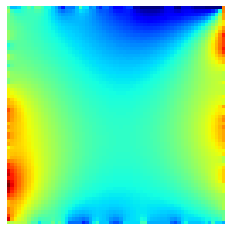

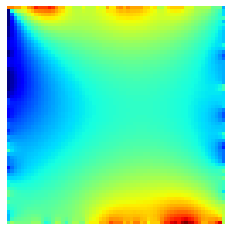

In [ ]:
full_pipeline(1000)

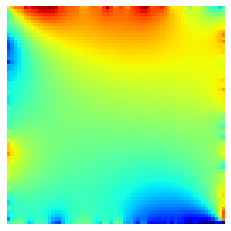

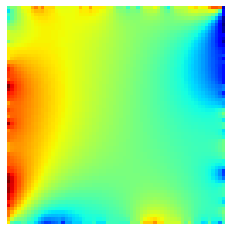

In [ ]:
full_pipeline(2000)

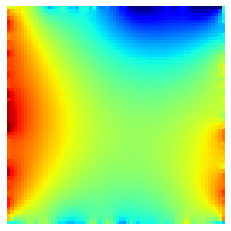

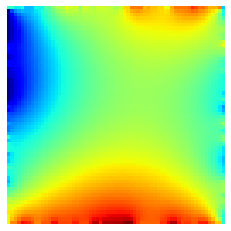

In [ ]:
full_pipeline(5000)

In [ ]:
def full_pipeline_draft_2(steps):
    temp_arr=np.zeros((x_length,y_length))
    temp_arr[:,0]=boundary_alg(x_length)
    temp_arr[0,:]=boundary_alg(x_length)
    temp_arr[:,x_length-1]=boundary_alg(x_length)
    temp_arr[y_length-1,:]=boundary_alg(x_length)
    #plt.imshow(temp_arr, interpolation='nearest',cmap='jet')
    temp_arr=temp_iter(temp_arr,steps)
    plt.axis('off')
    plt.figure(1)
    plt.imshow(temp_arr, interpolation='nearest',cmap='jet')
    plt.figure(2)
    plt.axis('off')
    temp_arr_2=np.rot90(temp_arr)
    plt.imshow(temp_arr_2, interpolation='nearest',cmap='jet')

In [ ]:
from scipy import ndimage



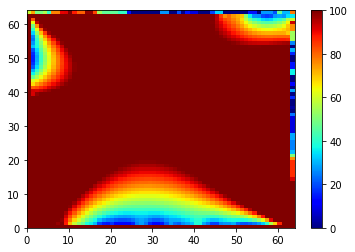

In [ ]:
plt.pcolormesh(temp_arr, cmap=plt.cm.jet, vmin=0, vmax=100)
plt.colorbar()
  


**Testing How long each Algorithm Takes**

**Generating 500 Boundary conditions**

In [ ]:
temp_arr_list=[]
for i in range(500):
  temp_arr=np.zeros((x_length,y_length))
  temp_arr[:,0]=boundary_alg(x_length)
  temp_arr[0,:]=boundary_alg(x_length)
  temp_arr[:,x_length-1]=boundary_alg(x_length)
  temp_arr[y_length-1,:]=boundary_alg(x_length)
  temp_arr_list.append(temp_arr)

import copy

temp_arr_list_2=copy.deepcopy(temp_arr_list)



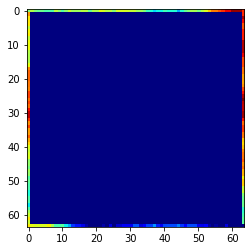

In [ ]:
plt.imshow(temp_arr_list[0],cmap="jet")

In [ ]:
print(temp_arr_list[0])

[[326.76373716 342.95344064 364.20104647 ... 343.67088273 343.67088273
  266.49675589]
 [142.01789426 252.82112571 304.01961832 ... 322.85921682 305.44583207
  266.49675589]
 [165.41500522 222.2944191  265.24540868 ... 308.62192911 288.75687297
  253.60536356]
 ...
 [338.61264433 305.97632202 281.24735433 ... 175.28520404 182.43842762
  188.41928569]
 [358.77784875 289.68883282 262.25356968 ... 175.86486246 177.98209629
  188.41928569]
 [200.93272404 231.74798248 231.74798248 ... 182.23706604 165.2058094
  139.9712006 ]]


In [ ]:
import time

start=time.time()

for arr in temp_arr_list:
  temp_iter(arr,1000)

print(time.time()-start)


3092.4866943359375


In [ ]:
import tensorflow as tf

In [ ]:
generator=tf.keras.models.load_model("grey_generators/generator_epoch_37.h5")

In [ ]:
expanded_temp_list=[tf.expand_dims(i,axis=0) for i in temp_arr_list_2]
start_nn=time.time()
for arr in expanded_temp_list:
  generator(arr)

print(time.time()-start_nn)

70.1445038318634


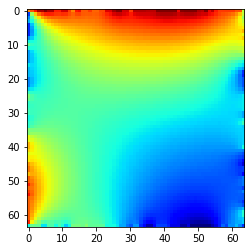

In [ ]:
arr_2=expanded_temp_list[0]
plt.imshow(temp_arr_list[0],cmap='jet')

In [ ]:
arr_2=expanded_temp_list[0]
#plt.imshow(tf.squeeze(arr_2))
plt.imshow(tf.squeeze(generator(arr_2)))